In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from statistics import mean
import scipy.stats as stats
import statistics
import re
from nlcor import nlcor
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy import asarray as ar,exp
from scipy.stats import pearsonr
from matplotlib.ticker import ScalarFormatter
import matplotlib.patches as mpatches
from statistics import NormalDist

In [2]:
basemodel_data = []
for subdir, dirs, files in os.walk('output_basemodel/plots_data'):
    for file in files:
        print(file)
        basemodel_data.append(file)

symmetry_00001 = []
for subdir, dirs, files in os.walk('output_symmetry_0.00001/plots_data'):
    for file in files:
        print(file)
        symmetry_00001.append(file)

symmetry_0001 = []
for subdir, dirs, files in os.walk('output_symmetry_0.0001/plots_data'):
    for file in files:
        print(file)
        symmetry_0001.append(file)
        
symmetry_001 = []
for subdir, dirs, files in os.walk('output_symmetry_0.001/plots_data'):
    for file in files:
        print(file)
        symmetry_001.append(file)

symmetry_005 = []
for subdir, dirs, files in os.walk('output_symmetry_0.005/plots_data'):
    for file in files:
        print(file)
        symmetry_005.append(file)



20240323_script_iteration=17.csv
20240223_script_iteration=5.csv
20240223_script_iteration=4.csv
20240323_script_iteration=16.csv
20240323_script_iteration=14.csv
20240223_script_iteration=6.csv
20240223_script_iteration=7.csv
20240323_script_iteration=15.csv
20240323_script_iteration=11.csv
20240223_script_iteration=3.csv
20240223_script_iteration=2.csv
20240323_script_iteration=10.csv
20240323_script_iteration=12.csv
20240223_script_iteration=1.csv
20240323_script_iteration=13.csv
20240223_script_iteration=10..csv
20240323_script_iteration=2.csv
20240323_script_iteration=3.csv
20240323_script_iteration=4.csv
20240323_script_iteration=5.csv
20240323_script_iteration=7.csv
20240323_script_iteration=6.csv
20240323_script_iteration=9.csv
20240323_script_iteration=20.csv
20240323_script_iteration=18.csv
20240223_script_iteration=9.csv
20240223_script_iteration=8.csv
symmetry_iteration8.csv
symmetry_iteration9.csv
symmetry_iteration10.csv
symmetry_iteration4.csv
symmetry_iteration5.csv
sym

In [3]:
final_mean = pd.DataFrame()
for i in basemodel_data:
    data = pd.read_csv(f'output_basemodel/plots_data/{i}')
    data = data[data['timestep'] > 160]
    data = data.mean()
    final_mean[i] = data
    print(f'info processing {i}')

final_mean = final_mean.T


sym00001_mean = pd.DataFrame()
for i in symmetry_00001:
    data = pd.read_csv(f'output_symmetry_0.00001/plots_data/{i}')
    data = data[data['timestep'] > 160]
    data = data.mean()
    sym00001_mean[i] = data
    print(f'info processing {i}')

sym00001_mean = sym00001_mean.T

sym0001_mean = pd.DataFrame()
for i in symmetry_0001:
    data = pd.read_csv(f'output_symmetry_0.0001/plots_data/{i}')
    data = data[data['timestep'] > 160]
    data = data.mean()
    sym0001_mean[i] = data
    print(f'info processing {i}')

sym0001_mean = sym0001_mean.T

sym001_mean = pd.DataFrame()
for i in symmetry_001:
    data = pd.read_csv(f'output_symmetry_0.001/plots_data/{i}')
    data = data[data['timestep'] > 160]
    data = data.mean()
    sym001_mean[i] = data
    print(f'info processing {i}')

sym001_mean = sym001_mean.T

sym005_mean = pd.DataFrame()
for i in symmetry_005:
    data = pd.read_csv(f'output_symmetry_0.005/plots_data/{i}')
    data = data[data['timestep'] > 160]
    data = data.mean()
    sym005_mean[i] = data
    print(f'info processing {i}')

sym005_mean = sym005_mean.T

info processing 20240323_script_iteration=17.csv
info processing 20240223_script_iteration=5.csv
info processing 20240223_script_iteration=4.csv
info processing 20240323_script_iteration=16.csv
info processing 20240323_script_iteration=14.csv
info processing 20240223_script_iteration=6.csv
info processing 20240223_script_iteration=7.csv
info processing 20240323_script_iteration=15.csv
info processing 20240323_script_iteration=11.csv
info processing 20240223_script_iteration=3.csv
info processing 20240223_script_iteration=2.csv
info processing 20240323_script_iteration=10.csv
info processing 20240323_script_iteration=12.csv
info processing 20240223_script_iteration=1.csv
info processing 20240323_script_iteration=13.csv
info processing 20240223_script_iteration=10..csv
info processing 20240323_script_iteration=2.csv
info processing 20240323_script_iteration=3.csv
info processing 20240323_script_iteration=4.csv
info processing 20240323_script_iteration=5.csv
info processing 20240323_scrip

<Figure size 750x1100 with 0 Axes>

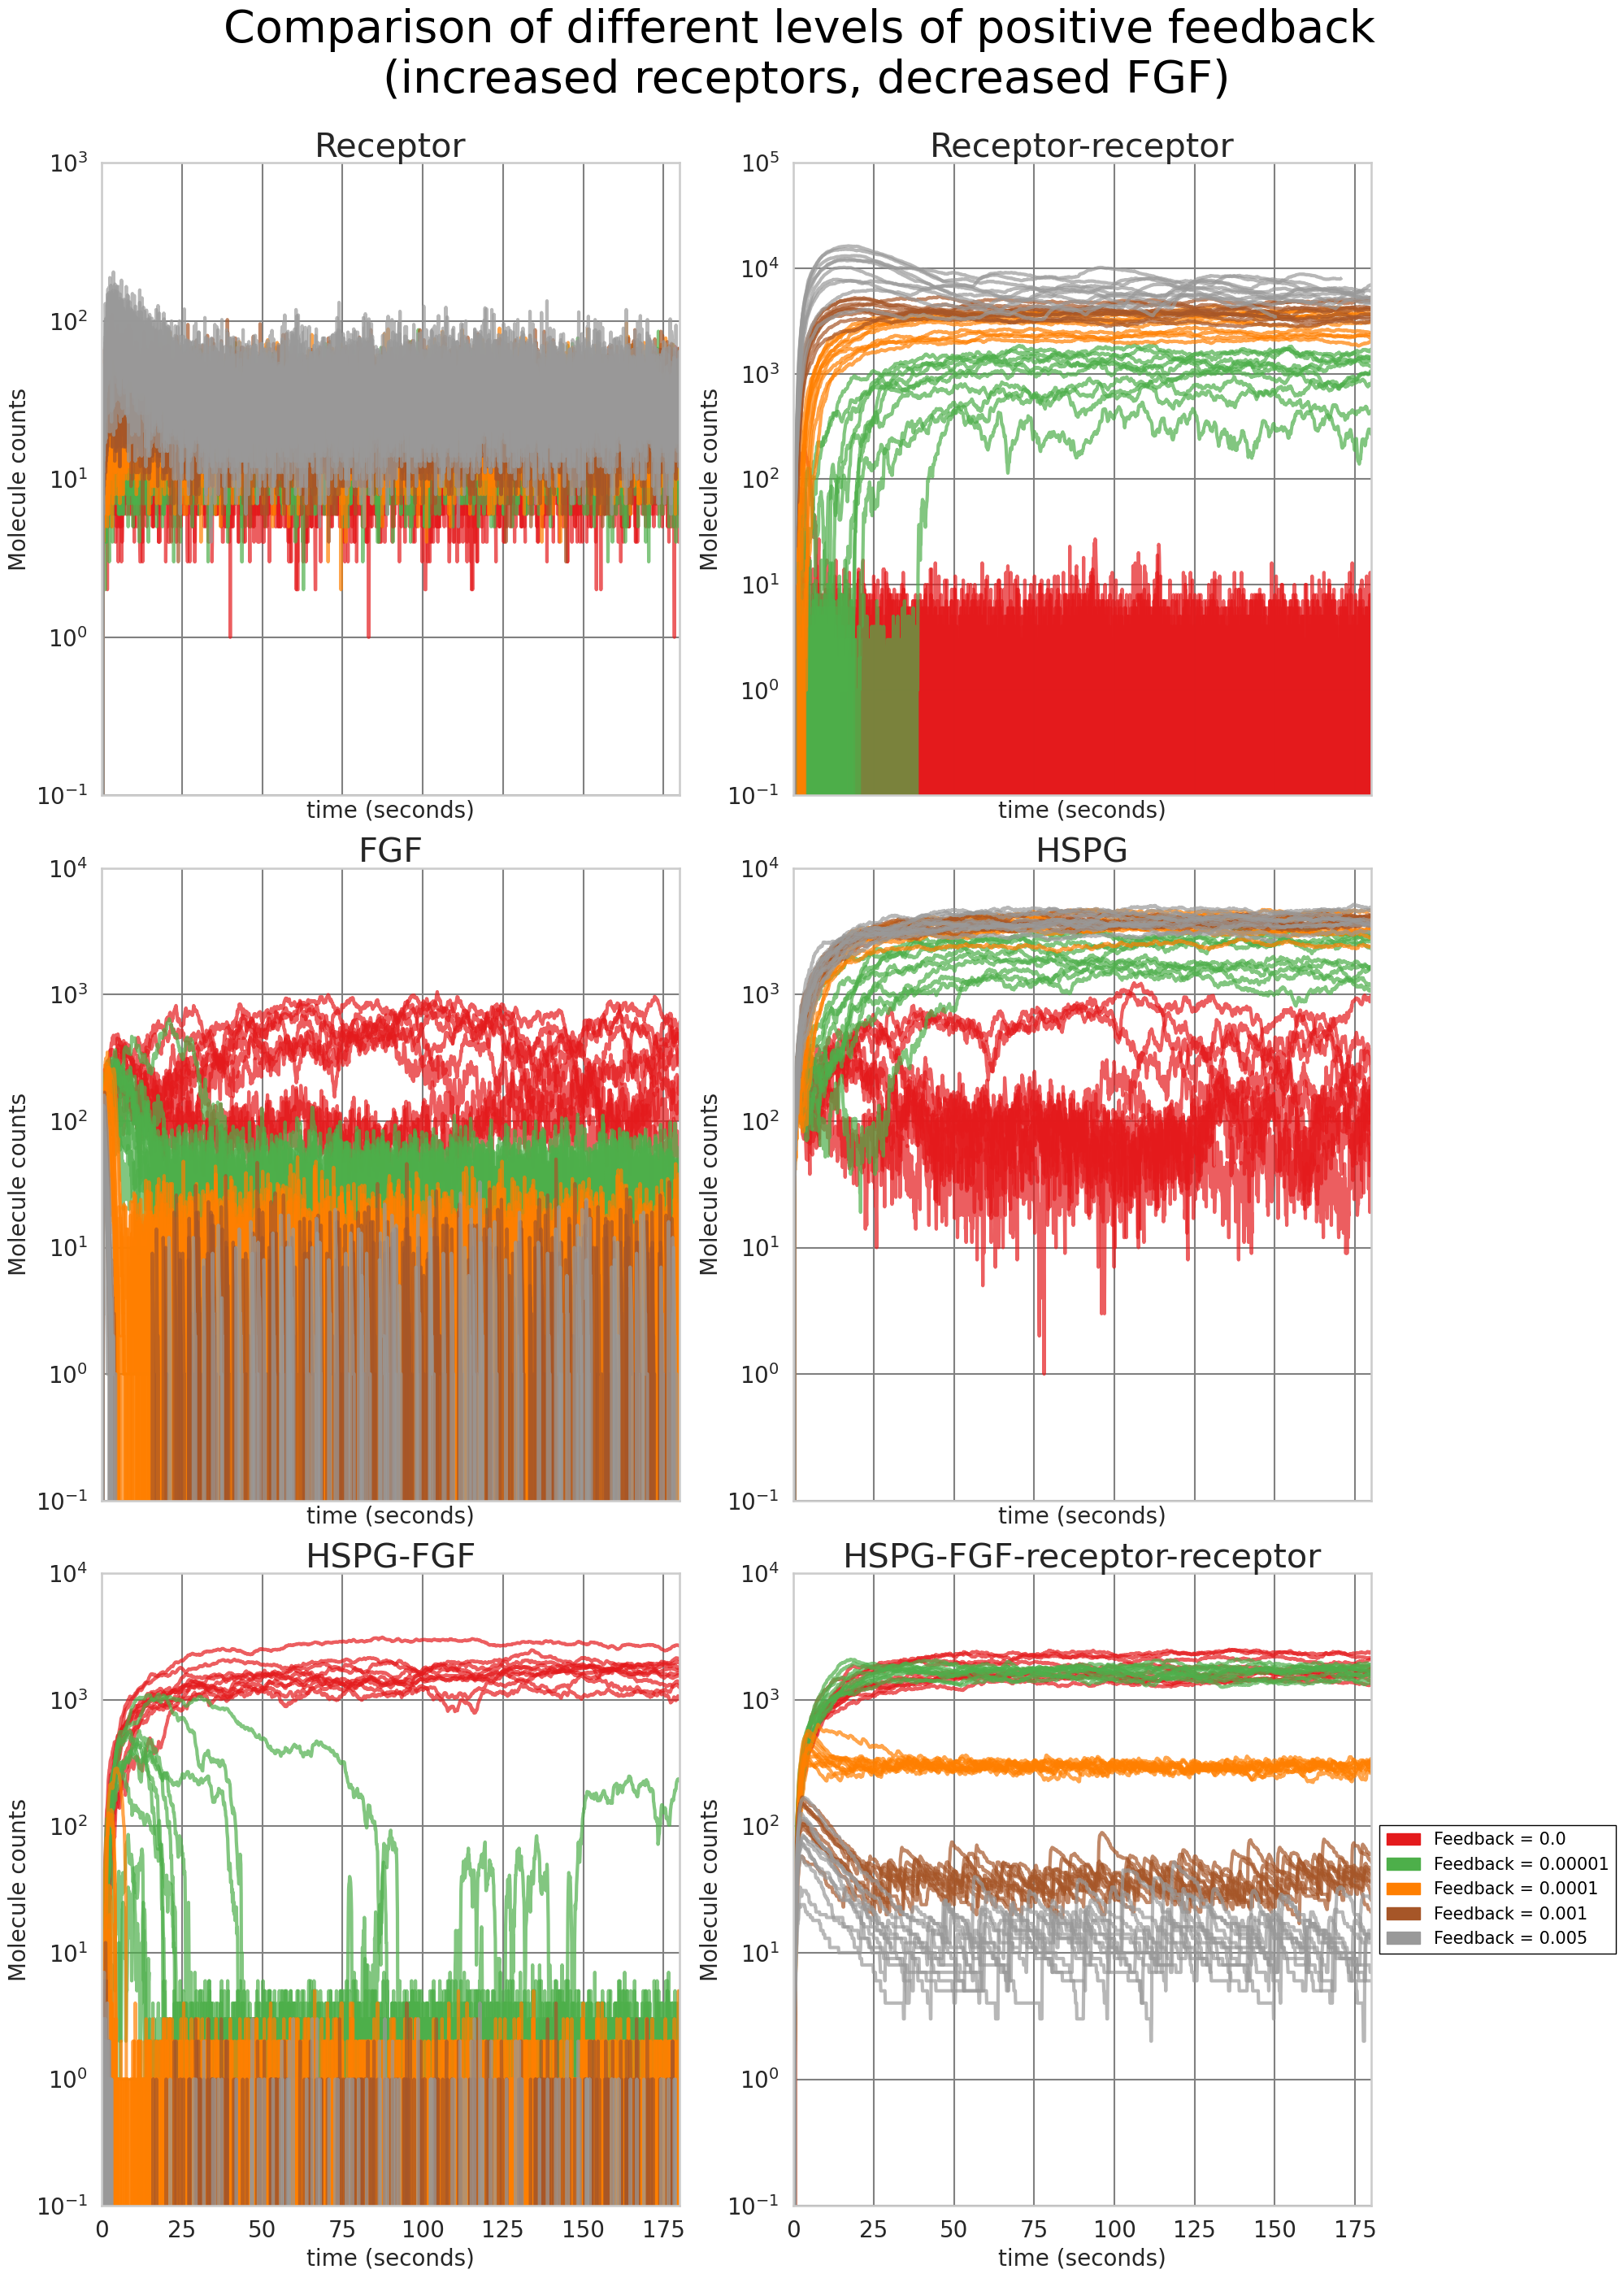

In [4]:
n_rows = 3
n_columns = 2
plt.figure(figsize=(7.5, 11))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(20, 28), sharey=False, sharex=True)
plt.style.use('classic')

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

my_alpha = 0.7

for i, filename in enumerate(basemodel_data[:10]):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[0], lw=3, alpha= my_alpha)
    axes[0,0].set_title('Receptor', fontsize=30)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[0], lw=3, alpha=my_alpha)
    axes[0,1].set_title('Receptor-receptor', fontsize=30)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[0], lw=3, alpha=my_alpha)
    axes[1,0].set_title('FGF', fontsize=30)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[0], lw=3, alpha=my_alpha)
    axes[1,1].set_title('HSPG', fontsize=30)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[0], lw=3, alpha=my_alpha)
    axes[2,0].set_title('HSPG-FGF', fontsize=30)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[0], lw=3, label='Basemodel (no feedback)', alpha=my_alpha)
    axes[2,1].set_title('HSPG-FGF-receptor-receptor', fontsize=30)


    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        # ax.axvspan(160, 180, color='orangered', alpha=0.1)
        ax.tick_params(labelsize=20, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=20)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=20)

for i, filename in enumerate(symmetry_00001):
    data = pd.read_csv(f'output_symmetry_0.00001/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[1], lw=3, label = '', alpha= my_alpha)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[1], lw=3, label = '', alpha=my_alpha)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[1], lw=3, label = '', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[1], lw=3, label = '', alpha=my_alpha)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[1], lw=3, label = '', alpha=my_alpha)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[1], lw=3, label='Feedback = 0.00001', alpha=my_alpha)


for i, filename in enumerate(symmetry_0001):
    data = pd.read_csv(f'output_symmetry_0.0001/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[2], lw=3,  alpha= my_alpha)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[2], lw=3, alpha=my_alpha)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[2], lw=3, alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[2], lw=3, alpha=my_alpha)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[2], lw=3, alpha=my_alpha)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[2], lw=3, label='Feedback = 0.0001', alpha=my_alpha)

for i, filename in enumerate(symmetry_001):
    data = pd.read_csv(f'output_symmetry_0.001/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[3], lw=3, alpha= my_alpha)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[3], lw=3, alpha=my_alpha)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[3], lw=3, alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[3], lw=3, alpha=my_alpha)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[3], lw=3, alpha=my_alpha)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[3], lw=3, label='Feedback = 0.005', alpha=my_alpha)

for i, filename in enumerate(symmetry_005):
    data = pd.read_csv(f'output_symmetry_0.005/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[4], lw=3, alpha= my_alpha)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[4], lw=3, alpha=my_alpha)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[4], lw=3, alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[4], lw=3, alpha=my_alpha)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[4], lw=3, alpha=my_alpha)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[4], lw=3, label='Feedback = 0.005', alpha=my_alpha)

plt.tick_params(axis='both', which='major', labelsize=20, direction='out')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.98, box.height*0.9])

basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0')
x00001_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.00001')
x0001_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.0001')
x001_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.001')
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='15', handles=[basemodel_patch, x00001_patch, x0001_patch, x001_patch, x005_patch])
fig.suptitle('Comparison of different levels of positive feedback \n(increased receptors, decreased FGF)', fontsize=40, y=1)
fig.tight_layout()
plt.savefig('symmetry_comparison_figures/molecule_counts_vs_time.png')

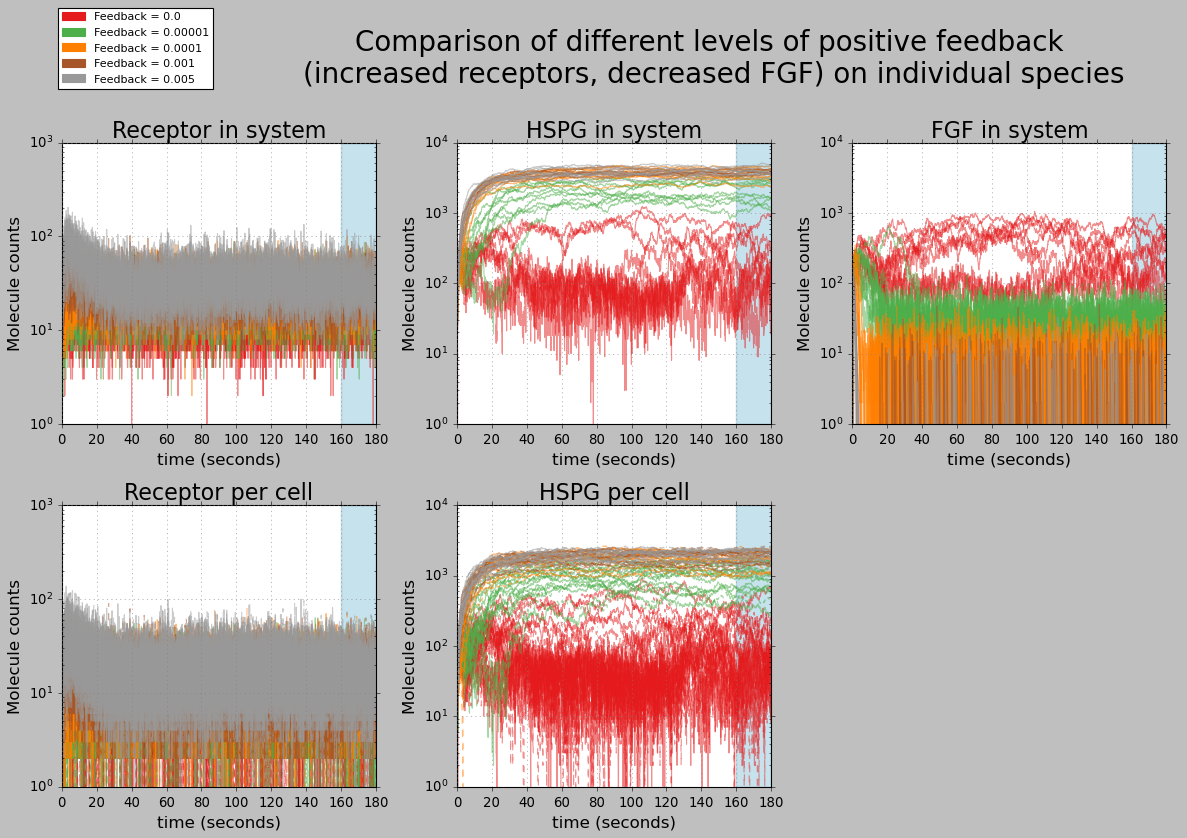

In [5]:
###### SPECIES COUNTS

fig, axes = plt.subplots(2,3, figsize=(15,12))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


plt.style.use('classic')
fig.delaxes(axes[1,2])

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

my_alpha = 0.5

title_size = 20
tick_size = 12
label_size = 15
line_w = 1

for i, filename in enumerate(basemodel_data[:10]):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[0,0].set_title('Receptor in system', fontsize=title_size)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,0].set_title('Receptor per cell', fontsize=title_size)

    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,2].set_title('FGF in system', fontsize=title_size)

    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,1].set_title('HSPG in system', fontsize=title_size)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,1].set_title('HSPG per cell', fontsize=title_size)

    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        ax.tick_params(labelsize=tick_size, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=label_size)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=label_size)
        ax.axvspan(160, 180, color='lightblue', alpha=0.1)

for i, filename in enumerate(symmetry_00001):
    data = pd.read_csv(f'output_symmetry_0.00001/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')


for i, filename in enumerate(symmetry_0001):
    data = pd.read_csv(f'output_symmetry_0.0001/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')


for i, filename in enumerate(symmetry_001):
    data = pd.read_csv(f'output_symmetry_0.001/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_005):
    data = pd.read_csv(f'output_symmetry_0.005/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')


basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0')
x00001_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.00001')
x0001_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.0001')
x001_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.001')
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005')
axes[0,0].legend(bbox_to_anchor=(0.5, 1.5), fontsize='10', handles=[basemodel_patch, x00001_patch, x0001_patch, x001_patch, x005_patch])
plt.tick_params(axis='both', which='major', labelsize=tick_size, direction='out')
#plt.legend(loc=(0.05, 0.05),fontsize=16)
fig.suptitle('Comparison of different levels of positive feedback \n(increased receptors, decreased FGF) on individual species', fontsize=25, y=0.85, x=0.6)
fig.tight_layout()
plt.savefig('symmetry_comparison_figures/individual_species_counts.png')

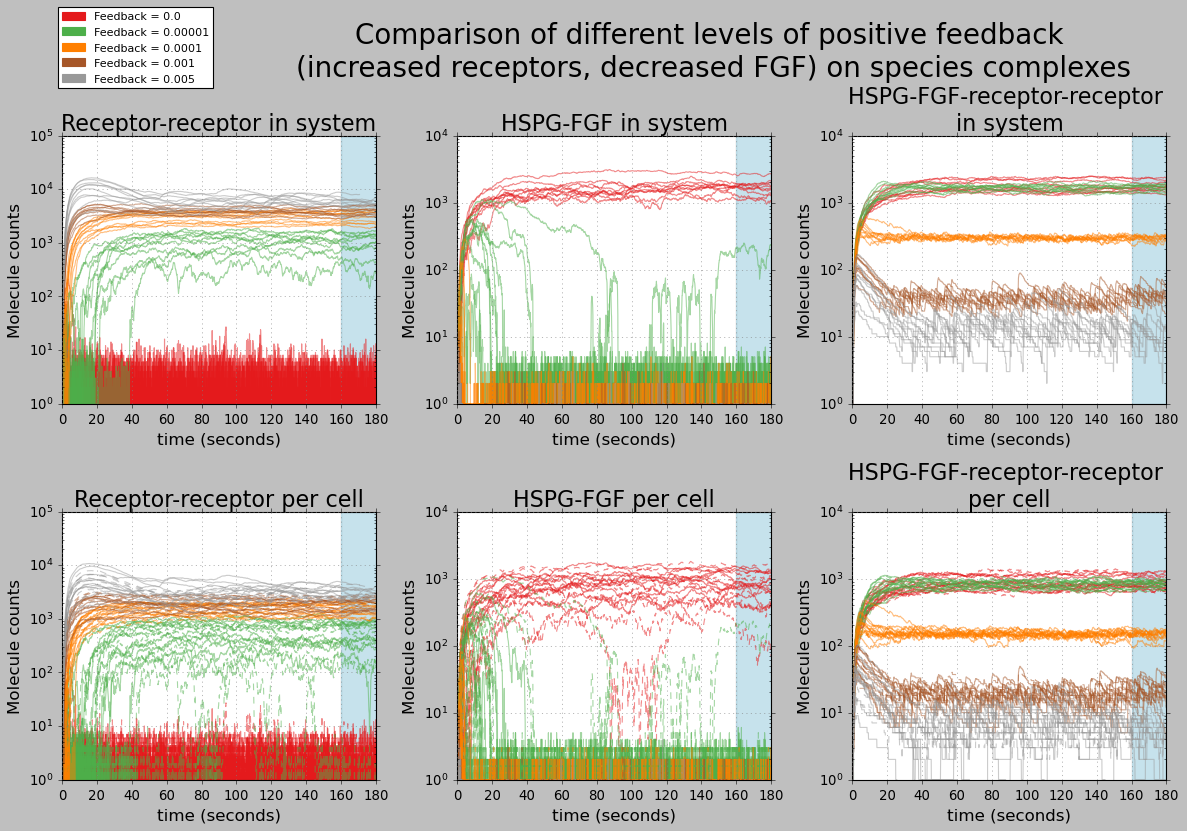

In [6]:
###### SPECIES COMPLEXES

fig, axes = plt.subplots(2,3, figsize=(15,12))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


plt.style.use('classic')

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

my_alpha = 0.5

title_size = 20
tick_size = 12
label_size = 15
line_w = 1

for i, filename in enumerate(basemodel_data[:10]):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[0,0].set_title('Receptor-receptor in system', fontsize=title_size)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,0].set_title('Receptor-receptor per cell', fontsize=title_size)

    #### HSPG-FGF SPECIES
    axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,1].set_title('HSPG-FGF in system', fontsize=title_size)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,1].set_title('HSPG-FGF per cell', fontsize=title_size)

    #### HHFRR SPECIES
    #axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #axes[0,2].set_title('HSPG-FGF-receptor-receptor \nin system', fontsize=title_size)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,2].set_title('HSPG-FGF-receptor-receptor \nper cell', fontsize=title_size)

    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        ax.axvspan(160, 180, color='lightblue', alpha=0.1)
        ax.tick_params(labelsize=tick_size, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=label_size)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=label_size)


for i, filename in enumerate(symmetry_00001):
    data = pd.read_csv(f'output_symmetry_0.00001/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    #axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    #axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    #axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_0001):
    data = pd.read_csv(f'output_symmetry_0.0001/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    #axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    #axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    #axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_001):
    data = pd.read_csv(f'output_symmetry_0.001/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    #axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    #axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    #axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_005):
    data = pd.read_csv(f'output_symmetry_0.005/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    # axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    # axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    # axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0')
x00001_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.00001')
x0001_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.0001')
x001_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.001')
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005')
axes[0,0].legend(bbox_to_anchor=(0.5, 1.5), fontsize='10', handles=[basemodel_patch, x00001_patch, x0001_patch, x001_patch, x005_patch])
plt.tick_params(axis='both', which='major', labelsize=tick_size, direction='out')
#plt.legend(loc=(0.05, 0.05),fontsize=16)
fig.suptitle('Comparison of different levels of positive feedback \n(increased receptors, decreased FGF) on species complexes', fontsize=25, y=0.85, x=0.6)
fig.tight_layout()
plt.savefig('symmetry_comparison_figures/species_complexes_counts.png')

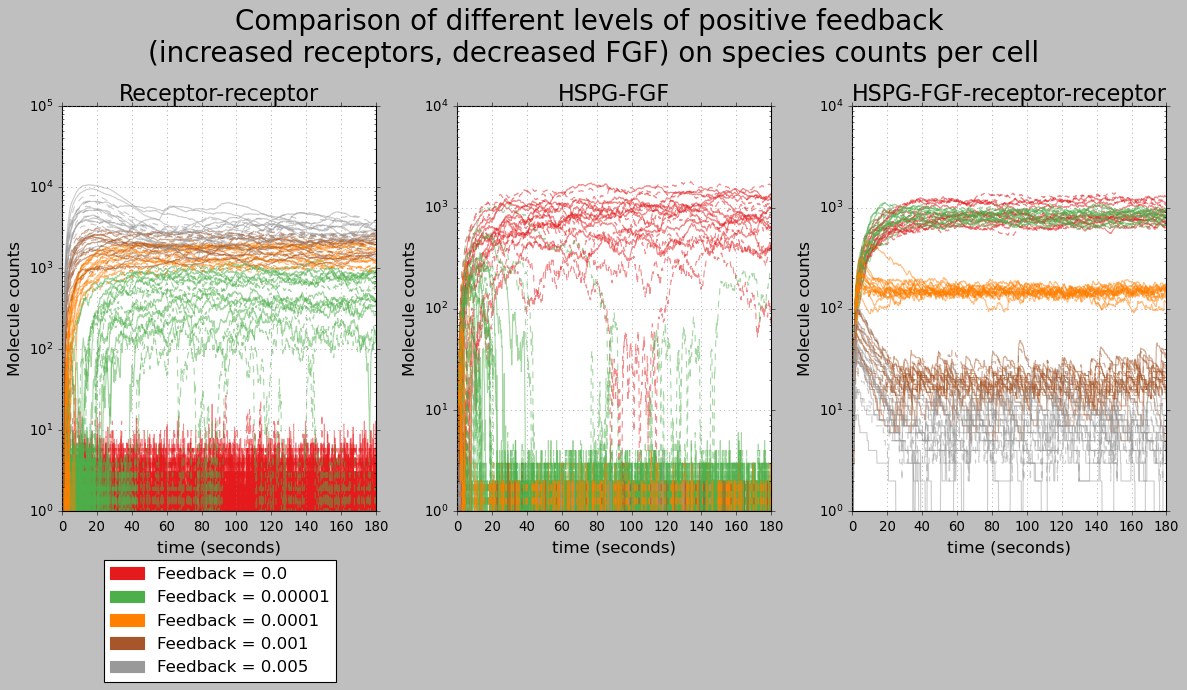

In [39]:
###### SPECIES COMPLEXES

fig, axes = plt.subplots(1,3, figsize=(15,9))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.style.use('classic')

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

my_alpha = 0.5

title_size = 20
tick_size = 12
label_size = 15
line_w = 1

for i, filename in enumerate(basemodel_data[:10]):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0].plot(data['timestep'], data['13.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[0].plot(data['timestep'], data['13.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[0].set_title('Receptor-receptor', fontsize=title_size)

    #### HSPG-FGF SPECIES
    axes[1].plot(data['timestep'], data['14.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1].plot(data['timestep'], data['14.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1].set_title('HSPG-FGF', fontsize=title_size)

    #### HHFRR SPECIES
    axes[2].plot(data['timestep'], data['15.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[2].plot(data['timestep'], data['15.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[2].set_title('HSPG-FGF-receptor-receptor', fontsize=title_size)

    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        ax.tick_params(labelsize=tick_size, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=label_size)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=label_size)


for i, filename in enumerate(symmetry_00001):
    data = pd.read_csv(f'output_symmetry_0.00001/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0].plot(data['timestep'], data['13.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[0].plot(data['timestep'], data['13.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    axes[1].plot(data['timestep'], data['14.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1].plot(data['timestep'], data['14.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    axes[2].plot(data['timestep'], data['15.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[2].plot(data['timestep'], data['15.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_0001):
    data = pd.read_csv(f'output_symmetry_0.0001/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0].plot(data['timestep'], data['13.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[0].plot(data['timestep'], data['13.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    axes[1].plot(data['timestep'], data['14.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1].plot(data['timestep'], data['14.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    axes[2].plot(data['timestep'], data['15.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[2].plot(data['timestep'], data['15.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_001):
    data = pd.read_csv(f'output_symmetry_0.001/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0].plot(data['timestep'], data['13.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[0].plot(data['timestep'], data['13.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    axes[1].plot(data['timestep'], data['14.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1].plot(data['timestep'], data['14.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    axes[2].plot(data['timestep'], data['15.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[2].plot(data['timestep'], data['15.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_005):
    data = pd.read_csv(f'output_symmetry_0.005/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0].plot(data['timestep'], data['13.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[0].plot(data['timestep'], data['13.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    axes[1].plot(data['timestep'], data['14.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1].plot(data['timestep'], data['14.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    axes[2].plot(data['timestep'], data['15.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[2].plot(data['timestep'], data['15.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0')
x00001_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.00001')
x0001_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.0001')
x001_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.001')
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005')
axes[0].legend(bbox_to_anchor=(0.9, -0.1), fontsize='15', handles=[basemodel_patch, x00001_patch, x0001_patch, x001_patch, x005_patch])
plt.tick_params(axis='both', which='major', labelsize=tick_size, direction='out')
#plt.legend(loc=(0.05, 0.05),fontsize=16)
fig.suptitle('Comparison of different levels of positive feedback \n(increased receptors, decreased FGF) on species counts per cell', fontsize=25,)
fig.tight_layout()
plt.savefig('symmetry_comparison_figures/species_complexes_counts_FINAL.png')

<Figure size 1200x800 with 0 Axes>

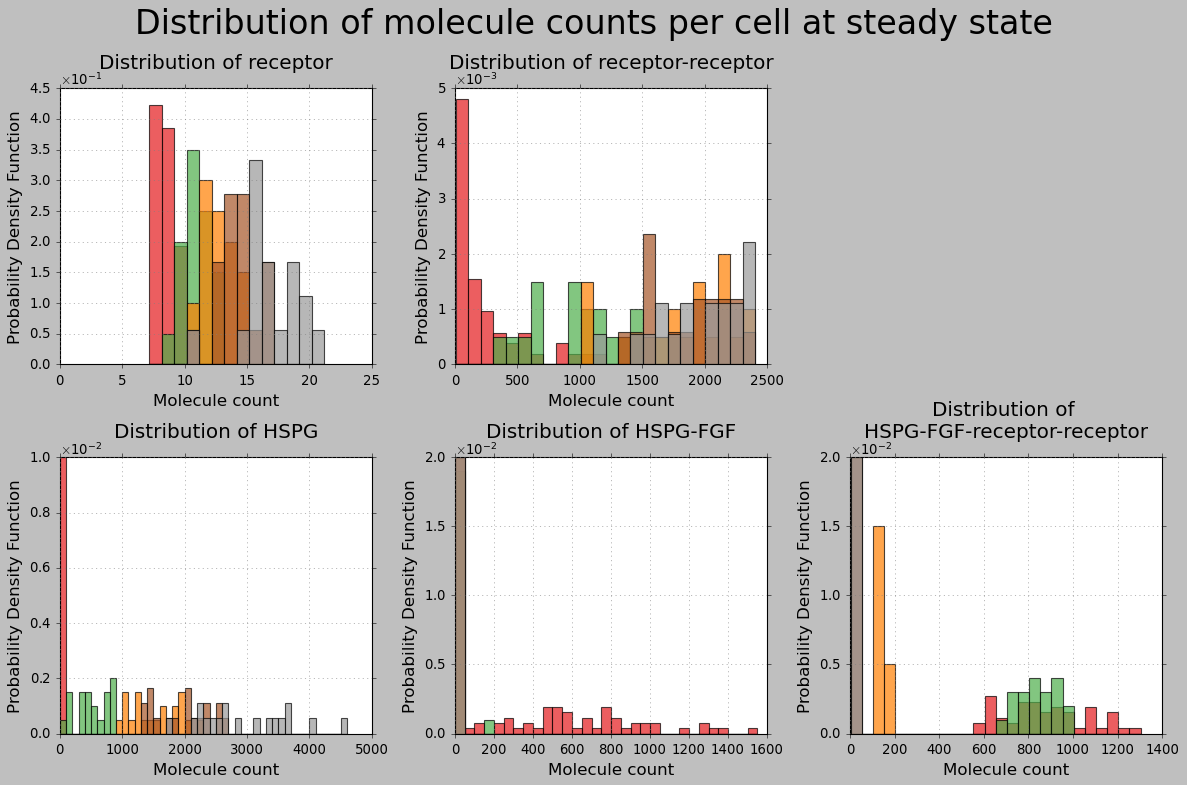

In [6]:
cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1, 5))
title_size = 18
tick_size = 12
label_size = 15
my_pad = 18
pdf = True

n_rows = 2
n_columns = 3
plt.figure(figsize=(15,10))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15,10), sharey=False)
plt.style.use('classic')
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)
plt.tick_params(axis='both', which='major', labelsize=15)
fig.delaxes(axes[0,2])
my_alpha = 0.7


#### Receptor, molecule 12, axes [0,0]
receptor_per_cell = pd.concat([final_mean['12.1'], final_mean['12.2']])
receptor_sym00001 = pd.concat([sym00001_mean['12.1'], sym00001_mean['12.2']])
receptor_sym0001 = pd.concat([sym0001_mean['12.1'], sym0001_mean['12.2']])
receptor_sym001 = pd.concat([sym001_mean['12.1'], sym001_mean['12.2']])
receptor_sym005 = pd.concat([sym005_mean['12.1'], sym005_mean['12.2']])
a = 1
n, bins, patches = axes[0,0].hist(receptor_per_cell, bins=np.arange(min(receptor_per_cell), max(receptor_sym005) + a, a), color=HFRRs[0], density=pdf, alpha=my_alpha)
n, bins, patches = axes[0,0].hist(receptor_sym00001, bins=np.arange(min(receptor_per_cell), max(receptor_sym005) + a, a), color=HFRRs[1], density=pdf, alpha=my_alpha)
n, bins, patches = axes[0,0].hist(receptor_sym0001, bins=np.arange(min(receptor_per_cell), max(receptor_sym005) + a, a), color=HFRRs[2], density=pdf, alpha=my_alpha)
n, bins, patches = axes[0,0].hist(receptor_sym001, bins=np.arange(min(receptor_per_cell), max(receptor_sym005) + a, a), color=HFRRs[3], density=pdf, alpha=my_alpha)
n, bins, patches = axes[0,0].hist(receptor_sym005, bins=np.arange(min(receptor_per_cell), max(receptor_sym005) + a, a), color=HFRRs[4], density=pdf, alpha=my_alpha)
# (mu, sigma) = norm.fit(receptor_per_cell)
axes[0,0].set_title('Distribution of receptor', fontsize=title_size, pad=my_pad)
axes[0,0].set_ylabel('Counts', fontsize=label_size)
axes[0,0].set_xlim(0,25)

#### Receptor-Receptor, molecule 13, axes [0,1]
receptordimer_per_cell = pd.concat([final_mean['13.1'], final_mean['13.2']])
receptordimer_sym00001 = pd.concat([sym00001_mean['13.1'], sym00001_mean['13.2']])
receptordimer_sym0001 = pd.concat([sym0001_mean['13.1'], sym0001_mean['13.2']])
receptordimer_sym001 = pd.concat([sym001_mean['13.1'], sym001_mean['13.2']])
receptordimer_sym005 = pd.concat([sym005_mean['13.1'], sym005_mean['13.2']])
b=100
n, bins, patches = axes[1,0].hist(receptordimer_per_cell, bins=np.arange(min(receptordimer_per_cell), max(receptordimer_sym005) + b, b), color=HFRRs[0], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,0].hist(receptordimer_sym00001, bins=np.arange(min(receptordimer_per_cell), max(receptordimer_sym005) + b, b), color=HFRRs[1], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,0].hist(receptordimer_sym0001, bins=np.arange(min(receptordimer_per_cell), max(receptordimer_sym005) + b, b), color=HFRRs[2], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,0].hist(receptordimer_sym001, bins=np.arange(min(receptordimer_per_cell), max(receptordimer_sym005) + b, b), color=HFRRs[3], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,0].hist(receptordimer_sym005, bins=np.arange(min(receptordimer_per_cell), max(receptordimer_sym005) + b, b), color=HFRRs[4], density=pdf, alpha=my_alpha)
# (mu, sigma) = norm.fit(receptordimer_per_cell)
axes[0,1].set_title('Distribution of receptor-receptor', fontsize=title_size, pad=my_pad)

#### HSPG, molecule 11, axes [1,0]
HSPG_per_cell = pd.concat([final_mean['11.1'], final_mean['11.2']])
HSPG_sym00001 = pd.concat([sym00001_mean['11.1'], sym00001_mean['11.2']])
HSPG_sym0001 = pd.concat([sym0001_mean['11.1'], sym0001_mean['11.2']])
HSPG_sym001 = pd.concat([sym001_mean['11.1'], sym001_mean['11.2']])
HSPG_sym005 = pd.concat([sym005_mean['11.1'], sym005_mean['11.2']])
c=100
n, bins, patches = axes[0,1].hist(HSPG_per_cell, bins=np.arange(min(HSPG_per_cell), max(HSPG_sym005) + c, c), color=HFRRs[0], density=pdf, alpha=my_alpha)
n, bins, patches = axes[0,1].hist(HSPG_sym00001, bins=np.arange(min(HSPG_per_cell), max(HSPG_sym005) + c, c), color=HFRRs[1], density=pdf, alpha=my_alpha)
n, bins, patches = axes[0,1].hist(HSPG_sym0001, bins=np.arange(min(HSPG_per_cell), max(HSPG_sym005) + c, c), color=HFRRs[2], density=pdf, alpha=my_alpha)
n, bins, patches = axes[0,1].hist(HSPG_sym001, bins=np.arange(min(HSPG_per_cell), max(HSPG_sym005) + c, c), color=HFRRs[3], density=pdf, alpha=my_alpha)
n, bins, patches = axes[0,1].hist(HSPG_sym005, bins=np.arange(min(HSPG_per_cell), max(HSPG_sym005) + c, c), color=HFRRs[4], density=pdf, alpha=my_alpha)
axes[1,0].set_title('Distribution of HSPG', fontsize=title_size, pad=my_pad)

#### HSPG-FGF, molecule 14, axes [1,1]
HSPGFGF_per_cell = pd.concat([final_mean['14.1'], final_mean['14.2']])
HSPGFGF_sym00001 = pd.concat([sym00001_mean['14.1'], sym00001_mean['14.2']])
HSPGFGF_sym0001 = pd.concat([sym0001_mean['14.1'], sym0001_mean['14.2']])
HSPGFGF_sym001 = pd.concat([sym001_mean['14.1'], sym001_mean['14.2']])
HSPGFGF_sym005 = pd.concat([sym005_mean['14.1'], sym005_mean['14.2']])
d = 50
n, bins, patches = axes[1,1].hist(HSPGFGF_per_cell, bins=np.arange(min(HSPGFGF_sym005), max(HSPGFGF_per_cell) + d, d), color=HFRRs[0], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,1].hist(HSPGFGF_sym00001, bins=np.arange(min(HSPGFGF_sym005), max(HSPGFGF_per_cell) + d, d), color=HFRRs[1], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,1].hist(HSPGFGF_sym0001, bins=np.arange(min(HSPGFGF_sym005), max(HSPGFGF_per_cell) + d, d), color=HFRRs[2],density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,1].hist(HSPGFGF_sym001, bins=np.arange(min(HSPGFGF_sym005), max(HSPGFGF_per_cell) + d, d), color=HFRRs[3], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,1].hist(HSPGFGF_sym005, bins=np.arange(min(HSPGFGF_sym005), max(HSPGFGF_per_cell) + d, d), color=HFRRs[4], density=pdf, alpha=my_alpha)
# (mu, sigma) = norm.fit(HSPGFGF_per_cell)
axes[1,1].set_title('Distribution of HSPG-FGF', fontsize=title_size, pad=my_pad)
axes[1,1].set_ylabel('Probability Density Function', fontsize=label_size)
axes[1,1].set_xlabel('Molecule count', fontsize=label_size)

#### HFRR, molecule 15, axes [2,0]
HFRR_per_cell = pd.concat([final_mean['15.1'],final_mean['15.2']])
HFRR_sym00001 = pd.concat([sym00001_mean['15.1'],sym00001_mean['15.2']])
HFRR_sym0001 = pd.concat([sym0001_mean['15.1'],sym0001_mean['15.2']])
HFRR_sym001 = pd.concat([sym001_mean['15.1'],sym001_mean['15.2']])
HFRR_sym005 = pd.concat([sym005_mean['15.1'],sym005_mean['15.2']])
e = 50
n, bins, patches = axes[1,2].hist(HFRR_per_cell, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[0], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,2].hist(HFRR_sym00001, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[1], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,2].hist(HFRR_sym0001, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[2], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,2].hist(HFRR_sym001, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[3], density=pdf, alpha=my_alpha)
n, bins, patches = axes[1,2].hist(HFRR_sym005, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[4], density=pdf, alpha=my_alpha)
# (mu, sigma) = norm.fit(HFRR_per_cell)
axes[1,2].set_title('Distribution of \nHSPG-FGF-receptor-receptor', fontsize=title_size, pad=my_pad)
axes[1,2].set_xlabel('Molecule count', fontsize=label_size)

for i,ax in enumerate(axes.flatten()):
    ax.grid(color='grey')
    ax.tick_params(labelsize=tick_size, direction='out')
    ax.set_ylabel(ylabel='Probability Density Function', fontsize=label_size)
    ax.set_xlabel(xlabel='Molecule count', fontsize=label_size)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,1))

# (mu, sigma) = norm.fit(HFRR_per_cell)
# y = mlab.normpdf(bins, mu, sigma)
# l = axes[1,2].plot(bins, y, 'r--', lw=2)

basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0', alpha=my_alpha)
x00001_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.00001')
x0001_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.0001')
x001_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.001')
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005')
# axes[0,0].legend(bbox_to_anchor=(0.5, 2), fontsize='10', handles=[basemodel_patch, x00001_patch, x0001_patch, x001_patch, x005_patch])

# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.65, box.height*0.9])
fig.suptitle('Distribution of molecule counts per cell at steady state', fontsize=30)
fig.tight_layout()
plt.savefig('symmetry_comparison_figures/histograms_per_cell.png')

In [7]:
norm = NormalDist.from_samples(HFRR_per_cell.dropna())
print(f'Feedback = None, mu = {norm.mean}, std = {norm.stdev}')
norm = NormalDist.from_samples(HFRR_sym00001)
print(f'Feedback = 0.00001, mu = {norm.mean}, std = {norm.stdev}')
norm = NormalDist.from_samples(HFRR_sym0001)
print(f'Feedback = 0.0001, mu = {norm.mean}, std = {norm.stdev}')
norm = NormalDist.from_samples(HFRR_sym001)
print(f'Feedback = 0.001, mu = {norm.mean}, std = {norm.stdev}')
norm = NormalDist.from_samples(HFRR_sym005.dropna())
print(f'Feedback = 0.005, mu = {norm.mean}, std = {norm.stdev}')


Feedback = None, mu = 878.1754688097972, std = 189.03211603087743
Feedback = 0.00001, mu = 835.947512437811, std = 86.90822030245899
Feedback = 0.0001, mu = 147.07718184958847, std = 12.970838847443607
Feedback = 0.001, mu = 20.76920950801548, std = 4.256116283256028
Feedback = 0.005, mu = 6.1754070107614885, std = 1.3404948411896114


In [8]:
HFRR_data = [HFRR_per_cell.dropna(), HFRR_sym00001, HFRR_sym0001, HFRR_sym001, HFRR_sym005.dropna()]
means = []
stds = []

for i in HFRR_data:
    norm = NormalDist.from_samples(i)
    print(f'mean={norm.mean}, std={norm.stdev}')
    means.append(norm.mean)
    stds.append(norm.stdev)

mean=878.1754688097972, std=189.03211603087743
mean=835.947512437811, std=86.90822030245899
mean=147.07718184958847, std=12.970838847443607
mean=20.76920950801548, std=4.256116283256028
mean=6.1754070107614885, std=1.3404948411896114


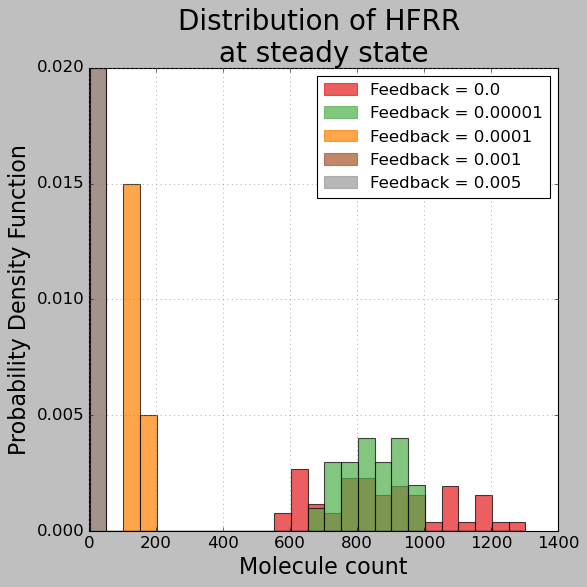

In [9]:

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

plt.style.use('classic')
plt.figure(figsize=(7.5, 7.5))
plt.tick_params(axis='both', which='major', labelsize=15)

e = 50
n, bins, patches = plt.hist(HFRR_per_cell, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[0], density=pdf, alpha=my_alpha)
n, bins, patches = plt.hist(HFRR_sym00001, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[1], density=pdf, alpha=my_alpha)
n, bins, patches = plt.hist(HFRR_sym0001, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[2], density=pdf, alpha=my_alpha)
n, bins, patches = plt.hist(HFRR_sym001, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[3], density=pdf, alpha=my_alpha)
n, bins, patches = plt.hist(HFRR_sym005, bins=np.arange(min(HFRR_sym005), max(HFRR_per_cell) + e, e), color=HFRRs[4], density=pdf, alpha=my_alpha)
# (mu, sigma) = norm.fit(HFRR_per_cell)
plt.title('Distribution of HFRR \nat steady state', fontsize=25)
plt.xlabel('Molecule count', fontsize=20)
plt.grid(color='grey')
plt.ylabel('Probability Density Function', fontsize=20)

basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0', alpha=my_alpha)
x00001_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.00001', alpha=my_alpha)
x0001_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.0001', alpha=my_alpha)
x001_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.001', alpha=my_alpha)
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005', alpha=my_alpha)
plt.legend(loc='upper right', fontsize='15', handles=[basemodel_patch, x00001_patch, x0001_patch, x001_patch, x005_patch])
plt.tight_layout()
plt.savefig('/Users/aimee/Desktop/HFRRhist.png')

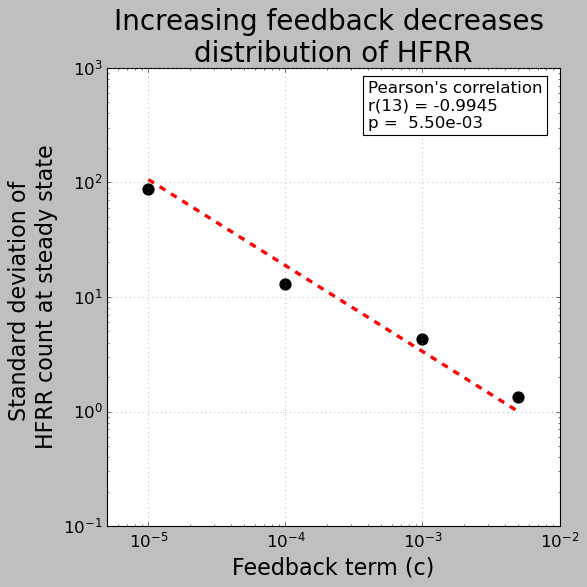

In [40]:
thetas = [0, 0.00001, 0.0001, 0.001, 0.005]

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

plt.style.use('classic')
plt.figure(figsize=(7.5, 7.5))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.scatter(thetas, stds, color='black', s=100)
plt.xscale('log')
plt.yscale('log')
# plt.ylim(1, 100)
plt.xlim(0.000005, 0.01)
plt.grid(color='grey')
plt.xlabel('Feedback term (c)', fontsize=20)
plt.ylabel('Standard deviation of \nHFRR count at steady state', fontsize=20)
plt.title('Increasing feedback decreases \ndistribution of HFRR', fontsize=25)


x = pearsonr(np.log(thetas[1:5]), np.log(stds[1:5]))
p_stat = x[0]
p_val = x[1]
plt.text(x=0.0004, y=300, s=f"Pearson's correlation\nr(13) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

x_fit = thetas
y_fit = stds
coefficients = np.polyfit(x_fit, y_fit, deg=1)
poly = np.poly1d(coefficients)
x = np.linspace(0.00001, 0.005, 100)
y = (x * 200) ** -0.75

plt.plot(x, y, color='red', linestyle='--', linewidth=3, label='  Linear Fit')
plt.tight_layout()
plt.savefig('symmetry_comparison_figures/stddev.png')


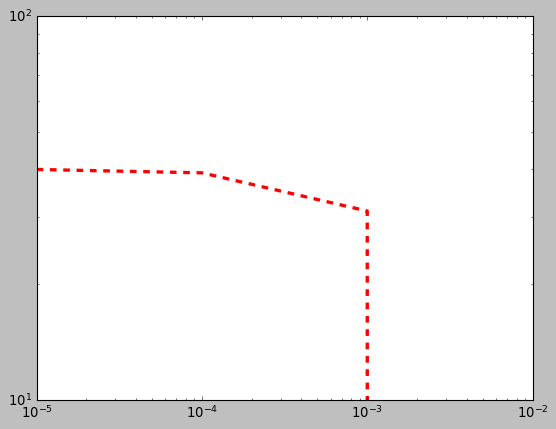

In [91]:
x_fit = thetas[1:5]
coefficients = np.polyfit(x_fit, stds[1:5], 1)
poly = np.poly1d(coefficients)
y_fit = poly(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=3, label='  Linear Fit')
plt.xscale('log')
plt.yscale('log')

In [69]:
np.log(thetas[1:5])

array([-11.51292546,  -9.21034037,  -6.90775528,  -5.29831737])

In [ ]:
n_rows = 1
n_columns = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(10, 12))

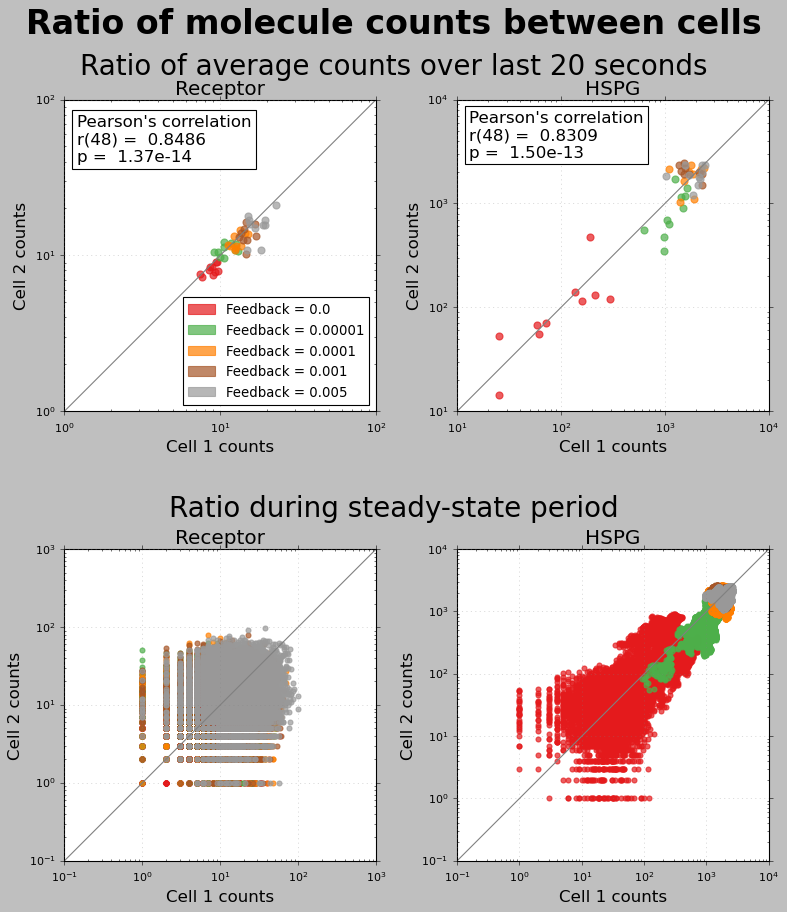

In [18]:
n_rows = 2
n_columns = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(10, 12))
plt.style.use('classic')
plt.tick_params(axis='both', which='major', labelsize=15)

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))


cell1_R = []
cell2_R = []
cell1_H = []
cell2_H = []


R_corr1 = []
H_corr1 = []
R_corr2 = []
H_corr2 = []

my_mean = pd.DataFrame()
for i, filename in enumerate(basemodel_data[:10]):
    readdata = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    data = readdata[readdata['timestep'] > 30]
    mydata = readdata[readdata['timestep'] > 160]
    my_mean[i] = mydata.mean()
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_12 = data['12.1'].values
        cell2_12 = data['12.2'].values
        cell1_11 = data['11.1'].values
        cell2_11 = data['11.2'].values

    else:
        cell1_12 = data['12.2'].values
        cell2_12 = data['12.1'].values
        cell1_11 = data['11.2'].values
        cell2_11 = data['11.1'].values

    cell1_R = cell1_12[-202:].mean()
    cell2_R = cell2_12[-202:].mean()
    cell1_H = cell1_11[-202:].mean()
    cell2_H = cell2_11[-202:].mean()



    data_lists_0 = [ (cell1_R, cell2_R),  (cell1_H, cell2_H), ]
    data_lists_1 = [ (cell1_12, cell2_12),  (cell1_11, cell2_11)]
    titles = ['Receptor', 'HSPG',]
    R_corr1.append(cell1_R)
    R_corr2.append(cell2_R)
    H_corr1.append(cell1_H)
    H_corr2.append(cell2_H)

    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[0], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)



    for ax, (data_x, data_y), title in zip(axes[1,:], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[0], alpha=my_alpha)
        ax.set_title(title, fontsize=20)


# Process data for symmetry_00001
for i, filename in enumerate(symmetry_00001):
    read_data = pd.read_csv(f'output_symmetry_0.00001/plots_data/{filename}')
    data = read_data[read_data['timestep'] > 30]
    my_data = read_data[read_data['timestep'] >= 160]
    my_mean[i] = my_data.mean()

    # Determine cell data based on mean
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15, cell2_15 = data['15.1'], data['15.2']
        cell1_12, cell2_12 = data['12.1'], data['12.2']
        cell1_13, cell2_13 = data['13.1'], data['13.2']
        cell1_11, cell2_11 = data['11.1'], data['11.2']
        cell1_14, cell2_14 = data['14.1'], data['14.2']
    else:
        cell1_15, cell2_15 = data['15.2'], data['15.1']
        cell1_12, cell2_12 = data['12.2'], data['12.1']
        cell1_13, cell2_13 = data['13.2'], data['13.1']
        cell1_11, cell2_11 = data['11.2'], data['11.1']
        cell1_14, cell2_14 = data['14.2'], data['14.1']

    # Calculate means for specific timesteps
    cell1_HFRR = cell1_15[-200:].mean()
    cell2_HFRR = cell2_15[-200:].mean()
    cell1_R = cell1_12[-200:].mean()
    cell2_R = cell2_12[-200:].mean()
    cell1_RR = cell1_13[-200:].mean()
    cell2_RR = cell2_13[-200:].mean()
    cell1_H = cell1_11[-200:].mean()
    cell2_H = cell2_11[-200:].mean()
    cell1_HF = cell1_14[-200:].mean()
    cell2_HF = cell2_14[-200:].mean()

    # Plot basemodel_data
    data_lists_0 = [(cell1_R, cell2_R), (cell1_H, cell2_H)]
    data_lists_1 = [(cell1_12, cell2_12), (cell1_11, cell2_11)]
    titles = ['Receptor',  'HSPG']
    R_corr1.append(cell1_R)
    R_corr2.append(cell2_R)
    H_corr1.append(cell1_H)
    H_corr2.append(cell2_H)

    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[1], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1, :], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[1], alpha=my_alpha)
        ax.set_title(title, fontsize=20)


# Process data for symmetry_0001
for i, filename in enumerate(symmetry_0001):
    read_data = pd.read_csv(f'output_symmetry_0.0001/plots_data/{filename}')
    data = read_data[read_data['timestep'] > 30]
    my_data = read_data[read_data['timestep'] >= 160]
    my_mean[i] = my_data.mean()

    # Determine cell data based on mean
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15, cell2_15 = data['15.1'], data['15.2']
        cell1_12, cell2_12 = data['12.1'], data['12.2']
        cell1_13, cell2_13 = data['13.1'], data['13.2']
        cell1_11, cell2_11 = data['11.1'], data['11.2']
        cell1_14, cell2_14 = data['14.1'], data['14.2']
    else:
        cell1_15, cell2_15 = data['15.2'], data['15.1']
        cell1_12, cell2_12 = data['12.2'], data['12.1']
        cell1_13, cell2_13 = data['13.2'], data['13.1']
        cell1_11, cell2_11 = data['11.2'], data['11.1']
        cell1_14, cell2_14 = data['14.2'], data['14.1']

    # Calculate means for specific timesteps
    cell1_HFRR = cell1_15[-200:].mean()
    cell2_HFRR = cell2_15[-200:].mean()
    cell1_R = cell1_12[-200:].mean()
    cell2_R = cell2_12[-200:].mean()
    cell1_RR = cell1_13[-200:].mean()
    cell2_RR = cell2_13[-200:].mean()
    cell1_H = cell1_11[-200:].mean()
    cell2_H = cell2_11[-200:].mean()
    cell1_HF = cell1_14[-200:].mean()
    cell2_HF = cell2_14[-200:].mean()

    # Plot basemodel_data
    data_lists_0 = [(cell1_R, cell2_R), (cell1_H, cell2_H)]
    data_lists_1 = [(cell1_12, cell2_12), (cell1_11, cell2_11)]
    titles = ['Receptor',  'HSPG']
    R_corr1.append(cell1_R)
    R_corr2.append(cell2_R)
    H_corr1.append(cell1_H)
    H_corr2.append(cell2_H)

    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[2], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1, :], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[2], alpha=my_alpha)
        ax.set_title(title, fontsize=20)


# Process data for symmetry_001
for i, filename in enumerate(symmetry_001):
    read_data = pd.read_csv(f'output_symmetry_0.001/plots_data/{filename}')
    data = read_data[read_data['timestep'] > 30]
    my_data = read_data[read_data['timestep'] >= 160]
    my_mean[i] = my_data.mean()

    # Determine cell data based on mean
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15, cell2_15 = data['15.1'], data['15.2']
        cell1_12, cell2_12 = data['12.1'], data['12.2']
        cell1_13, cell2_13 = data['13.1'], data['13.2']
        cell1_11, cell2_11 = data['11.1'], data['11.2']
        cell1_14, cell2_14 = data['14.1'], data['14.2']
    else:
        cell1_15, cell2_15 = data['15.2'], data['15.1']
        cell1_12, cell2_12 = data['12.2'], data['12.1']
        cell1_13, cell2_13 = data['13.2'], data['13.1']
        cell1_11, cell2_11 = data['11.2'], data['11.1']
        cell1_14, cell2_14 = data['14.2'], data['14.1']

    # Calculate means for specific timesteps
    cell1_HFRR = cell1_15[-200:].mean()
    cell2_HFRR = cell2_15[-200:].mean()
    cell1_R = cell1_12[-200:].mean()
    cell2_R = cell2_12[-200:].mean()
    cell1_RR = cell1_13[-200:].mean()
    cell2_RR = cell2_13[-200:].mean()
    cell1_H = cell1_11[-200:].mean()
    cell2_H = cell2_11[-200:].mean()
    cell1_HF = cell1_14[-200:].mean()
    cell2_HF = cell2_14[-200:].mean()

    # Plot basemodel_data
    data_lists_0 = [(cell1_R, cell2_R), (cell1_H, cell2_H)]
    data_lists_1 = [(cell1_12, cell2_12), (cell1_11, cell2_11)]
    titles = ['Receptor',  'HSPG']
    R_corr1.append(cell1_R)
    R_corr2.append(cell2_R)
    H_corr1.append(cell1_H)
    H_corr2.append(cell2_H)

    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[3], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1, :], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[3], alpha=my_alpha)
        ax.set_title(title, fontsize=20)


# Process data for symmetry_005
for i, filename in enumerate(symmetry_005):
    read_data = pd.read_csv(f'output_symmetry_0.005/plots_data/{filename}')
    data = read_data[read_data['timestep'] > 30]
    my_data = read_data[read_data['timestep'] >= 160]
    my_mean[i] = my_data.mean()

    # Determine cell data based on mean
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15, cell2_15 = data['15.1'], data['15.2']
        cell1_12, cell2_12 = data['12.1'], data['12.2']
        cell1_13, cell2_13 = data['13.1'], data['13.2']
        cell1_11, cell2_11 = data['11.1'], data['11.2']
        cell1_14, cell2_14 = data['14.1'], data['14.2']
    else:
        cell1_15, cell2_15 = data['15.2'], data['15.1']
        cell1_12, cell2_12 = data['12.2'], data['12.1']
        cell1_13, cell2_13 = data['13.2'], data['13.1']
        cell1_11, cell2_11 = data['11.2'], data['11.1']
        cell1_14, cell2_14 = data['14.2'], data['14.1']

    # Calculate means for specific timesteps
    cell1_HFRR = cell1_15[-200:].mean()
    cell2_HFRR = cell2_15[-200:].mean()
    cell1_R = cell1_12[-200:].mean()
    cell2_R = cell2_12[-200:].mean()
    cell1_RR = cell1_13[-200:].mean()
    cell2_RR = cell2_13[-200:].mean()
    cell1_H = cell1_11[-200:].mean()
    cell2_H = cell2_11[-200:].mean()
    cell1_HF = cell1_14[-200:].mean()
    cell2_HF = cell2_14[-200:].mean()

    # Plot basemodel_data
    data_lists_0 = [(cell1_R, cell2_R), (cell1_H, cell2_H)]
    data_lists_1 = [(cell1_12, cell2_12), (cell1_11, cell2_11)]
    titles = ['Receptor',  'HSPG']
    R_corr1.append(cell1_R)
    R_corr2.append(cell2_R)
    H_corr1.append(cell1_H)
    H_corr2.append(cell2_H)

    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[4], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1, :], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[4], alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    my_limits_0 = [(0,25),  (0,3000), ]
    my_limits_1 = [(0,120),  (0,3000),]
    titles = ['Receptor',  'HSPG', ]
    for j in range(2):
        # axes[0, j].set_xlim(my_limits_0[j])
        # axes[0, j].set_ylim(my_limits_0[j])
        # axes[1, j].set_xlim(my_limits_1[j])
        # axes[1, j].set_ylim(my_limits_1[j])
        axes[0, j].set_title(titles[j], fontsize=18)
        axes[1, j].set_title(titles[j], fontsize=18)

for i,ax in enumerate(axes.flatten()):
    ax.grid(color='grey', alpha=0.5)
    ax.tick_params(labelsize=10, direction='out')
    ax.set_xlabel(xlabel='Cell 1 counts', fontsize=15)
    ax.set_ylabel(ylabel='Cell 2 counts', fontsize=15)
    ax.axline((0,0), slope=1, color='grey')
    ax.set_aspect('equal', adjustable='box')
    ax.set(yscale='log', xscale='log')



fig.suptitle('Ratio of molecule counts between cells', fontsize=30, horizontalalignment='center', fontweight='bold', x=0.5)
fig.text(0.5, 0.91, 'Ratio of average counts over last 20 seconds', fontsize=25, horizontalalignment='center')
fig.text(0.5, 0.45, 'Ratio during steady-state period', fontsize=25,  horizontalalignment='center')

x = pearsonr(R_corr1, R_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,0].text(x=1.2, y=40, s=f"Pearson's correlation\nr(48) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)
x = pearsonr(H_corr1, H_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,1].text(x=13, y=2800, s=f"Pearson's correlation\nr(48) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)


basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0', alpha=my_alpha)
x00001_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.00001', alpha=my_alpha)
x0001_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.0001', alpha=my_alpha)
x001_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.001', alpha=my_alpha)
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005', alpha=my_alpha)
axes[0,0].legend(loc='lower right', fontsize='12', handles=[basemodel_patch, x00001_patch, x0001_patch, x001_patch, x005_patch])
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('symmetry_comparison_figures/symmetry_individual_species_ratio.png')
plt.show()


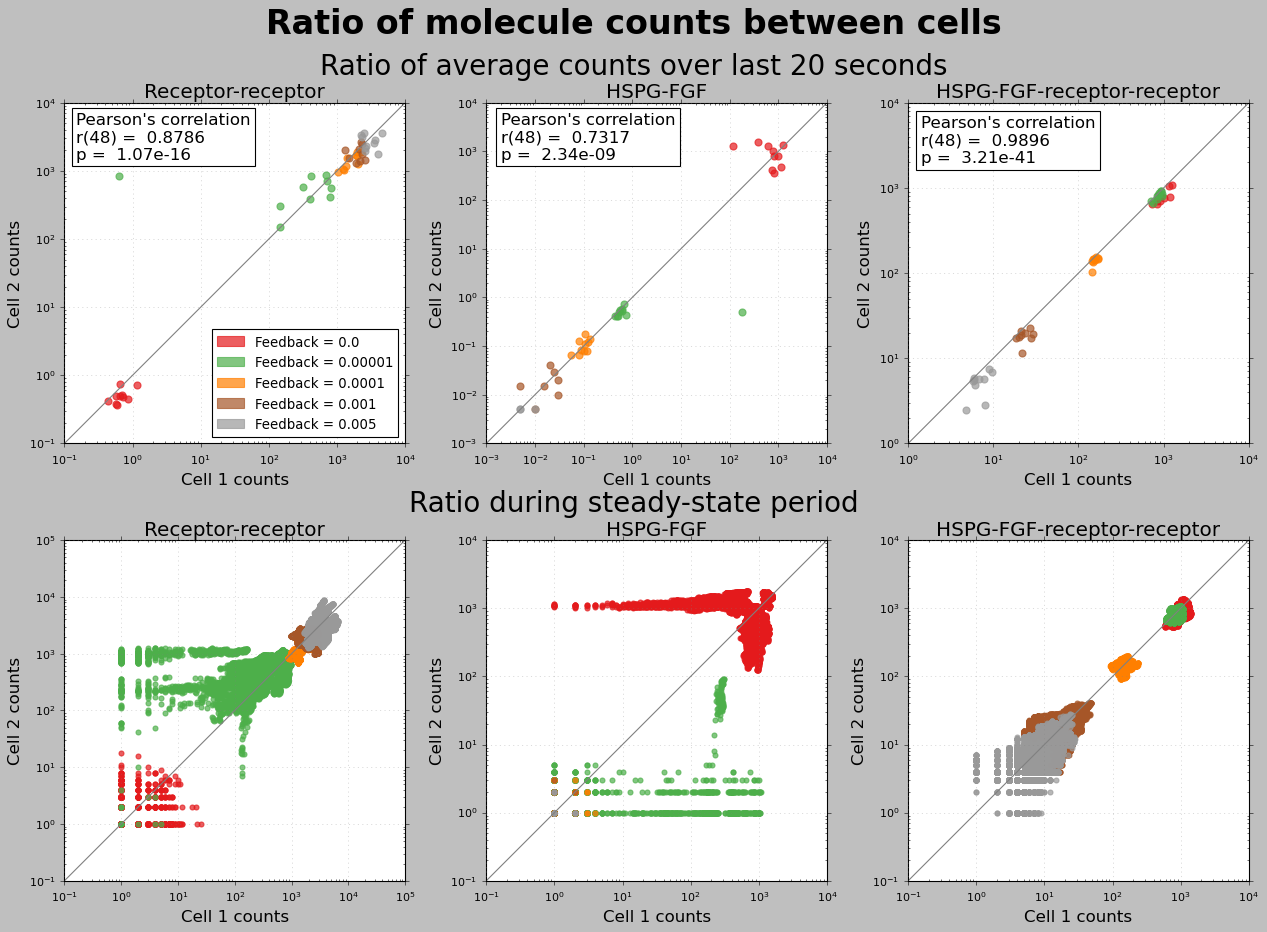

In [19]:
n_rows = 2
n_columns = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(16, 12))
fig.subplots_adjust(hspace=0.2)
plt.style.use('classic')
plt.tick_params(axis='both', which='major', labelsize=15)

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

cell1_HFRR = []
cell2_HFRR = []
cell1_RR = []
cell2_RR = []
cell1_HF = []
cell2_HF = []


RR_corr1 = []
HF_corr1 = []
HFRR_corr1 = []
RR_corr2 = []
HF_corr2 = []
HFRR_corr2 = []

my_mean = pd.DataFrame()
for i, filename in enumerate(basemodel_data[:10]):
    readdata = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    data = readdata[readdata['timestep'] > 30]
    mydata = readdata[readdata['timestep'] > 160]
    my_mean[i] = mydata.mean()
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15 = data['15.1'].values
        cell2_15 = data['15.2'].values
        cell1_13 = data['13.1'].values
        cell2_13 = data['13.2'].values
        cell1_14 = data['14.1'].values
        cell2_14 = data['14.2'].values

    else:
        cell1_15 = data['15.2'].values
        cell2_15 = data['15.1'].values
        cell1_13 = data['13.2'].values
        cell2_13 = data['13.1'].values
        cell1_14 = data['14.2'].values
        cell2_14 = data['14.1'].values

    cell1_HFRR = cell1_15[-202:].mean()
    cell2_HFRR = cell2_15[-202:].mean()
    cell1_RR = cell1_13[-202:].mean()
    cell2_RR = cell2_13[-202:].mean()
    cell1_HF = cell1_14[-202:].mean()
    cell2_HF = cell2_14[-202:].mean()


    data_lists_0 = [ (cell1_RR, cell2_RR),  (cell1_HF, cell2_HF), (cell1_HFRR, cell2_HFRR) ]
    data_lists_1 = [ (cell1_13, cell2_13), (cell1_14, cell2_14), (cell1_15, cell2_15)]
    titles = [ 'Receptor-receptor',  'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    RR_corr1.append(cell1_RR)
    RR_corr2.append(cell2_RR)
    HF_corr1.append(cell1_HF)
    HF_corr2.append(cell2_HF)
    HFRR_corr1.append(cell1_HFRR)
    HFRR_corr2.append(cell2_HFRR)
    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[0], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1,:], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[0], alpha=my_alpha)
        ax.set_title(title, fontsize=20)


# Process data for symmetry_00001
for i, filename in enumerate(symmetry_00001):
    read_data = pd.read_csv(f'output_symmetry_0.00001/plots_data/{filename}')
    data = read_data[read_data['timestep'] > 30]
    my_data = read_data[read_data['timestep'] >= 160]
    my_mean[i] = my_data.mean()

    # Determine cell data based on mean
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15, cell2_15 = data['15.1'], data['15.2']
        cell1_13, cell2_13 = data['13.1'], data['13.2']
        cell1_14, cell2_14 = data['14.1'], data['14.2']
    else:
        cell1_15, cell2_15 = data['15.2'], data['15.1']
        cell1_13, cell2_13 = data['13.2'], data['13.1']
        cell1_14, cell2_14 = data['14.2'], data['14.1']

    # Calculate means for specific timesteps
    cell1_HFRR = cell1_15[-200:].mean()
    cell2_HFRR = cell2_15[-200:].mean()
    cell1_RR = cell1_13[-200:].mean()
    cell2_RR = cell2_13[-200:].mean()
    cell1_HF = cell1_14[-200:].mean()
    cell2_HF = cell2_14[-200:].mean()

    # Plot basemodel_data
    data_lists_0 = [(cell1_RR, cell2_RR), (cell1_HF, cell2_HF), (cell1_HFRR, cell2_HFRR)]
    data_lists_1 = [(cell1_13, cell2_13), (cell1_14, cell2_14), (cell1_15, cell2_15)]
    titles = ['Receptor-receptor',  'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    RR_corr1.append(cell1_RR)
    RR_corr2.append(cell2_RR)
    HF_corr1.append(cell1_HF)
    HF_corr2.append(cell2_HF)
    HFRR_corr1.append(cell1_HFRR)
    HFRR_corr2.append(cell2_HFRR)
    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[1], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1, :], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[1], alpha=my_alpha)
        ax.set_title(title, fontsize=20)

# Process data for symmetry_0001
for i, filename in enumerate(symmetry_0001):
    read_data = pd.read_csv(f'output_symmetry_0.0001/plots_data/{filename}')
    data = read_data[read_data['timestep'] > 30]
    my_data = read_data[read_data['timestep'] >= 160]
    my_mean[i] = my_data.mean()

    # Determine cell data based on mean
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15, cell2_15 = data['15.1'], data['15.2']
        cell1_13, cell2_13 = data['13.1'], data['13.2']
        cell1_14, cell2_14 = data['14.1'], data['14.2']
    else:
        cell1_15, cell2_15 = data['15.2'], data['15.1']
        cell1_13, cell2_13 = data['13.2'], data['13.1']
        cell1_14, cell2_14 = data['14.2'], data['14.1']

    # Calculate means for specific timesteps
    cell1_HFRR = cell1_15[-200:].mean()
    cell2_HFRR = cell2_15[-200:].mean()
    cell1_RR = cell1_13[-200:].mean()
    cell2_RR = cell2_13[-200:].mean()
    cell1_HF = cell1_14[-200:].mean()
    cell2_HF = cell2_14[-200:].mean()

    # Plot basemodel_data
    data_lists_0 = [(cell1_RR, cell2_RR), (cell1_HF, cell2_HF), (cell1_HFRR, cell2_HFRR)]
    data_lists_1 = [(cell1_13, cell2_13), (cell1_14, cell2_14), (cell1_15, cell2_15)]
    titles = ['Receptor-receptor',  'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    RR_corr1.append(cell1_RR)
    RR_corr2.append(cell2_RR)
    HF_corr1.append(cell1_HF)
    HF_corr2.append(cell2_HF)
    HFRR_corr1.append(cell1_HFRR)
    HFRR_corr2.append(cell2_HFRR)
    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[2], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1, :], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[2], alpha=my_alpha)
        ax.set_title(title, fontsize=20)

# Process data for symmetry_001
for i, filename in enumerate(symmetry_001):
    read_data = pd.read_csv(f'output_symmetry_0.001/plots_data/{filename}')
    data = read_data[read_data['timestep'] > 30]
    my_data = read_data[read_data['timestep'] >= 160]
    my_mean[i] = my_data.mean()

    # Determine cell data based on mean
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15, cell2_15 = data['15.1'], data['15.2']
        cell1_13, cell2_13 = data['13.1'], data['13.2']
        cell1_14, cell2_14 = data['14.1'], data['14.2']
    else:
        cell1_15, cell2_15 = data['15.2'], data['15.1']
        cell1_13, cell2_13 = data['13.2'], data['13.1']
        cell1_14, cell2_14 = data['14.2'], data['14.1']

    # Calculate means for specific timesteps
    cell1_HFRR = cell1_15[-200:].mean()
    cell2_HFRR = cell2_15[-200:].mean()
    cell1_RR = cell1_13[-200:].mean()
    cell2_RR = cell2_13[-200:].mean()
    cell1_HF = cell1_14[-200:].mean()
    cell2_HF = cell2_14[-200:].mean()

    # Plot basemodel_data
    data_lists_0 = [(cell1_RR, cell2_RR), (cell1_HF, cell2_HF), (cell1_HFRR, cell2_HFRR)]
    data_lists_1 = [(cell1_13, cell2_13), (cell1_14, cell2_14), (cell1_15, cell2_15)]
    titles = ['Receptor-receptor',  'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    RR_corr1.append(cell1_RR)
    RR_corr2.append(cell2_RR)
    HF_corr1.append(cell1_HF)
    HF_corr2.append(cell2_HF)
    HFRR_corr1.append(cell1_HFRR)
    HFRR_corr2.append(cell2_HFRR)
    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[3], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1, :], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[3], alpha=my_alpha)
        ax.set_title(title, fontsize=20)

# Process data for symmetry_005
for i, filename in enumerate(symmetry_005):
    read_data = pd.read_csv(f'output_symmetry_0.005/plots_data/{filename}')
    data = read_data[read_data['timestep'] > 30]
    my_data = read_data[read_data['timestep'] >= 160]
    my_mean[i] = my_data.mean()

    # Determine cell data based on mean
    if data['15.1'].tail(200).mean() > data['15.2'].tail(200).mean():
        cell1_15, cell2_15 = data['15.1'], data['15.2']
        cell1_13, cell2_13 = data['13.1'], data['13.2']
        cell1_14, cell2_14 = data['14.1'], data['14.2']
    else:
        cell1_15, cell2_15 = data['15.2'], data['15.1']
        cell1_13, cell2_13 = data['13.2'], data['13.1']
        cell1_14, cell2_14 = data['14.2'], data['14.1']

    # Calculate means for specific timesteps
    cell1_HFRR = cell1_15[-200:].mean()
    cell2_HFRR = cell2_15[-200:].mean()
    cell1_RR = cell1_13[-200:].mean()
    cell2_RR = cell2_13[-200:].mean()
    cell1_HF = cell1_14[-200:].mean()
    cell2_HF = cell2_14[-200:].mean()

    # Plot basemodel_data
    data_lists_0 = [(cell1_RR, cell2_RR), (cell1_HF, cell2_HF), (cell1_HFRR, cell2_HFRR)]
    data_lists_1 = [(cell1_13, cell2_13), (cell1_14, cell2_14), (cell1_15, cell2_15)]
    titles = ['Receptor-receptor',  'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    RR_corr1.append(cell1_RR)
    RR_corr2.append(cell2_RR)
    HF_corr1.append(cell1_HF)
    HF_corr2.append(cell2_HF)
    HFRR_corr1.append(cell1_HFRR)
    HFRR_corr2.append(cell2_HFRR)
    for ax, (data_x, data_y), title in zip(axes[0, :], data_lists_0, titles):
        ax.scatter(data_x, data_y, color=HFRRs[4], s=40, alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    for ax, (data_x, data_y), title in zip(axes[1, :], data_lists_1, titles):
        ax.scatter(data_x, data_y, color=HFRRs[4], alpha=my_alpha)
        ax.set_title(title, fontsize=20)

    my_limits_0 = [(0,5000),  (0,2000), (0,1200)]
    my_limits_1 = [(0,10000),  (0,2000), (0,1600)]
    titles = [ 'Receptor-receptor',  'HSPG-FGF', 'HSPG-FGF-receptor-receptor']
    for j in range(3):
        # axes[0,j].set_xlim(my_limits_0[j])
        # axes[0,j].set_ylim(my_limits_0[j])
        # axes[1,j].set_xlim(my_limits_1[j])
        # axes[1,j].set_ylim(my_limits_1[j])
        axes[0,j].set_title(titles[j], fontsize=18)
        axes[1,j].set_title(titles[j], fontsize=18)

for i,ax in enumerate(axes.flatten()):
    ax.grid(color='grey', alpha=0.5)
    ax.tick_params(labelsize=10, direction='out')
    ax.set_xlabel(xlabel='Cell 1 counts', fontsize=15)
    ax.set_ylabel(ylabel='Cell 2 counts', fontsize=15)
    ax.axline((0,0), slope=1, color='grey')
    ax.set_aspect('equal', adjustable='box')
    ax.set(yscale='log', xscale='log')



fig.suptitle('Ratio of molecule counts between cells', fontsize=30, horizontalalignment='center', fontweight='bold', x=0.5)
fig.text(0.5, 0.91, 'Ratio of average counts over last 20 seconds', fontsize=25, horizontalalignment='center')
fig.text(0.5, 0.455, 'Ratio during steady-state period', fontsize=25,  horizontalalignment='center')

x = pearsonr(RR_corr1, RR_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,0].text(x=0.15, y=1500, s=f"Pearson's correlation\nr(48) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

x = pearsonr(HF_corr1, HF_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,1].text(x=0.002, y=700, s=f"Pearson's correlation\nr(48) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

x = pearsonr(HFRR_corr1, HFRR_corr2)
p_stat = x[0]
p_val = x[1]
axes[0,2].text(x=1.4, y=2000, s=f"Pearson's correlation\nr(48) = {p_stat: .4} \np = {p_val: .2e}",bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

x00001_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.00001', alpha=my_alpha)
x0001_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.0001', alpha=my_alpha)
x001_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.001', alpha=my_alpha)
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005', alpha=my_alpha)
axes[0,0].legend(loc='best', fontsize='12', handles=[basemodel_patch, x00001_patch, x0001_patch, x001_patch, x005_patch])
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('symmetry_comparison_figures/symmetry_species_complexes_ratio.png')
plt.show()